# Deep learning for computer vision


This notebook will teach you to build and train convolutional networks for image recognition. Brace yourselves.

## Convolutions

**Linear** layer: $X$ (`batch_size x n_input_features`) $\rightarrow$ Linear($X$, $W$, $b$) (`batch_size x n_output_channels`)

**Conv2d** layer: $X$ (`batch_size x n_input_channels x H x W`) $\rightarrow$ Conv2d($X$, $W$, $b$) (`batch_size x n_output_channels x H_out x W_out`)

Example for a 1-channel image:

![Credits: https://stackoverflow.com/questions/52067833/how-to-plot-an-animated-matrix-in-matplotlib](https://i.stack.imgur.com/uEoXw.gif)


In practice, convolution is applied to multi-channel tensors (e.g., RGB image is a 3-channel tensor: `3 x H x W`). Say we transform an RGB image.

* input: $X$ (`1 x n_input_channels=3 x H=7 x W=7`)
* **"kernel"**: $W$ (`n_output_channels=2 x n_input_channels=3 x H_kernel=3 x W_kernel=3`) -- learnable parameters
* output: $\text{Conv2d}(X, W)$ (`n_output_channels=2 x H_out=5 x W_out=5` &mdash; no padding)
<br/><br/>
<br/><br/>

<center>
<img src="https://drive.google.com/uc?id=1mKm-qNYkem8PCYl_MVKGNCVz06UMPP_5" width=700></center>

<sub>Original picture credits: [link](https://mc.ai/a-comprehensive-introduction-to-different-types-of-convolutions-in-deep-learning/)</sub>

<!-- ![Credits: [CS231n, Stanford](https://cs231n.github.io/convolutional-networks/#case)](https://drive.google.com/uc?id=1rw6N1kUFYpzU3D5044u-kitsrTI69Gxj) -->
<!-- <sub>Picture credits: [link](https://cs231n.github.io/convolutional-networks/#case)</sub> -->

<br/><br/>
Convolution can be 1D, 2D, 3D, etc. The principle is the same: a small kernel sliding over feature axes ($H$, $W$ in 2D case) and calculating scalar product with values of $X$ it falls upon.


**A simple question.** Conv2D with **zero padding of 3** from each side.
* input: $X$ (`1 x n_input_channels=5 x H=8 x W=9`)
* kernel: $W$ (`n_output_channels=3 x n_input_channels=5 x H_kernel=5 x W_kernel=3`) -- learnable parameters
* output: $\text{Conv2d}(X, W)$ (`n_output_channels=? x H_out=? x W_out=?`)

In [0]:
import torch
import torch.nn as nn

layer = nn.Conv2d(5, 3, (5, 3), stride=1, padding=3) #KERNEL W:(n_output_channels=3 x n_input_channels=5 x H_kernel=5 x W_kernel=3)
input = torch.rand(1, 5, 8, 9) #input = [1,5,8,9](1 x n_input_channels=5 x H=8 x W=9) 
print(layer(input).shape)      #shape of Output: (n_output_channels=? x H_out=? x W_out=?)    

# can also be written as:
import torch.nn.functional as F
kernel = torch.rand(3, 5, 5, 3)
print(F.conv2d(input, kernel, padding=3).shape)

torch.Size([1, 3, 10, 13])
torch.Size([1, 3, 10, 13])



Linear layer is more general: every Conv2d can be implemented by some Linear layer, but not vice versa. So **what do we love Conv2d for?**

*   very lightweight (by several orders of magnitude fewer parameters)
*   => we can stack a lot of them!
*   stacked convolutions learn image features as a hierarchy: first simple geometric features, then more complex concepts
*   convnets are winners in the most image recognition tasks

## Max pooling

<center>
<center>
<img src="https://www.researchgate.net/publication/333593451/figure/fig2/AS:765890261966848@1559613876098/Illustration-of-Max-Pooling-and-Average-Pooling-Figure-2-above-shows-an-example-of-max.pn" height="400"></center>

In [0]:
layer = nn.MaxPool2d(kernel_size=2)
input = torch.rand(1, 5, 8, 9)
layer(input).shape

torch.Size([1, 5, 4, 4])

## ConvNets

VGG

![](https://media.geeksforgeeks.org/wp-content/uploads/20200219152207/new41.jpg)

<sub>Picture credits: [GeeksforGeeks](https://www.geeksforgeeks.org/vgg-16-cnn-model/)</sub>

ResNet

<center>
<img src="https://neurohive.io/wp-content/uploads/2019/01/resnet-architecture-3.png" width=500></center>

<sub>Picture credits: [Neurohive](https://neurohive.io/ru/vidy-nejrosetej/resnet-34-50-101/)</sub>

Very large and nice longread about various ConvNets which exist today and how to build them: https://github.com/mbadry1/DeepLearning.ai-Summary/tree/master/4-%20Convolutional%20Neural%20Networks

# CIFAR10 dataset
In this seminar we'll focus on the image recognition problem on CIFAR10 dataset:
* 60000 32x32 RGB images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
* 10 different classes: ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
import torchvision
import torch
from torchvision import transforms

In [0]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                             download=True, transform=transforms.ToTensor())
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


## Image examples ##

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

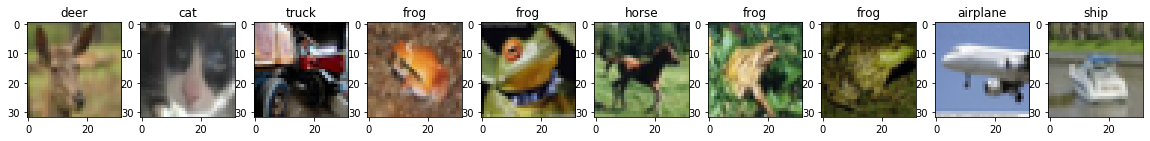

In [0]:
n_pics_to_show = 10
fig, ax = plt.subplots(1, n_pics_to_show, figsize=(20, 10))

for i in range(n_pics_to_show):
    rand_idx = np.random.randint(len(train_dataset))
    pic, label = train_dataset[rand_idx]
    
    pic_np = pic.data.numpy()
    pic_np = np.rollaxis(pic_np, 0, 3)    # 3xHxW to HxWx3
    ax[i].imshow(pic_np)
    ax[i].set_title(class_names[label])

# Building a network

Simple neural networks with layers applied on top of one another can be implemented as `torch.nn.Sequential` - just add a list of pre-built modules and let it train.

Let's create a mini-convolutional network with such architecture:
* 3x3 convolution with 128 out channels and _ReLU_ activation
* 2x2 pooling (or set previous convolution stride to 3)
* Flatten
* Dense layer with 1024 neurons and _ReLU_ activation
* 30% dropout
* Output dense layer.


__Convolutional layers__ in torch are just like all other layers, but with a specific set of parameters:

__`...`__

__`nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3)) # convolution`__

__`nn.MaxPool2d(2) # max pooling 2x2`__

__`...`__


Once you're done (and compute_loss no longer raises errors), train it with __Adam__ optimizer with default params (feel free to modify the code above).

In [0]:
import numpy as np
import torch, torch.nn as nn
import torch.nn.functional as F

import utils
from utils import compute_loss, compute_accuracy, plot_loss_and_accuracy, \
    plot_classes_preds

# a special module reshapes tensor from [batch, channel, w, h] to [batch, units]
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [0]:
*
* )
* 
* 
* 
* 


In [0]:
def make_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, padding=1),#3x3convolution with 128 out channels 
        nn.ReLU(),                                                            #and _ReLU_ activation
        nn.MaxPool2d(kernel_size=2),   #2x2 pooling(or set previous convolution stride to 3)
        Flatten(),                     #Flatten 
        nn.Linear(128 * (32 // 2) ** 2, 1024),    #Dense layer with 1024 neurons and _ReLU_ activation
        nn.Dropout(0.3),                          #30% dropout
        nn.Linear(1024, 200),                     # Output dense layer.
        nn.LogSoftmax(dim=1))
    return model

In two previous seminars we had to write a function **iterate_minibatches**, which receives a full dataset and returns random batches from it. Pytorch already has a very efficient tool for this called **Dataloader**:

In [0]:
batch_size = 150  # number of samples processed in one iteration
train_batch_gen = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=4)

In [0]:
batch_size_val = 50
val_batch_gen = torch.utils.data.DataLoader(val_dataset, 
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=1)

In this task, a **training loop** is fully written for you below, you don't have to modify it. It's not the most important part right now, and you should be more or less familiar from previous seminars how to write a basic training loop, so let's not concentrate on it today.

In [0]:
import time
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter

device = 'cuda:0'

def train(model, num_epochs=50, lr=0.01, exp_name='my_network'):
    writer = SummaryWriter(f'runs/{exp_name}')
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    train_loss = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train(True) # enable dropout / batch_norm training behavior

        train_accuracy_batch = []

        for batch_no, (X_batch, y_batch) in tqdm(enumerate(train_batch_gen), 
                                                 total=len(train_batch_gen)):
            model.zero_grad()
            # transferring batch to GPU
            X_batch_gpu = X_batch.to(device)
            # forward propagation through the model
            logits = model(X_batch_gpu)
            # calculating loss
            loss = compute_loss(logits, y_batch, device=device)
            # backward propagation through the model
            loss.backward()
            # optimizer step
            opt.step()

            train_loss.append(loss.item())

            accuracy = compute_accuracy(logits, y_batch, device=device)
            train_accuracy_batch.append(accuracy.item())

            if batch_no % 15 == 0:
                plot_loss_and_accuracy(train_loss, train_accuracy, val_accuracy, clear_output=True)
                print(f'epoch {epoch} training stage...')
                
                # sending loss to TensorBoard (don't think about this for now)
                writer.add_scalar('training loss',
                                  loss.item(),
                                  len(train_loss))

        train_accuracy_overall = np.mean(train_accuracy_batch) * 100
        train_accuracy.append(train_accuracy_overall.item())

        print(f'epoch {epoch} testing stage...')
        model.train(False) # disable dropout / use averages for batch_norm
        val_accuracy_batch = []
        for X_batch, y_batch in tqdm(val_batch_gen):
            # transferring batch to GPU
            X_batch_gpu = X_batch.to(device)
            # forward propagation through the model
            logits = model(X_batch_gpu)

            # let's calculate the accuracy:
            accuracy = compute_accuracy(logits, y_batch, device=device)
            val_accuracy_batch.append(accuracy.item())
            
        # sending pictures to TensorBoard (don't think about this for now)
        writer.add_figure('predictions vs. actuals',
                          plot_classes_preds(model, X_batch_gpu, y_batch),
                          global_step=epoch)

        val_accuracy_overall = np.mean(val_accuracy_batch) * 100
        val_accuracy.append(val_accuracy_overall.item())

Let's train our network!

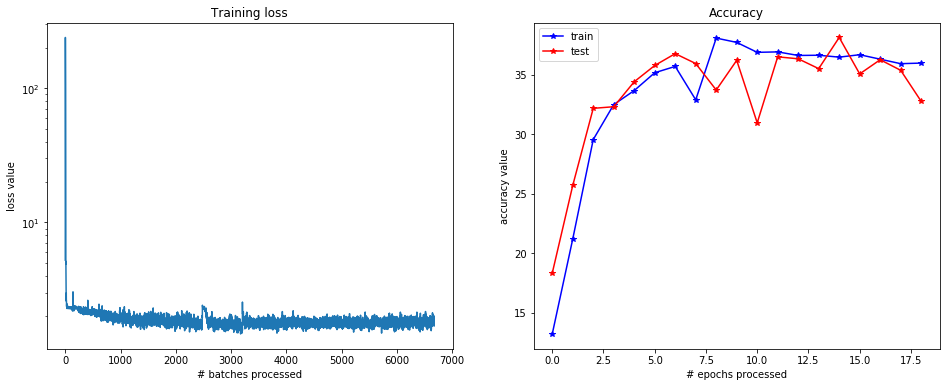

  0%|          | 0/67 [00:00<?, ?it/s]

epoch 19 training stage...
epoch 19 testing stage...


100%|██████████| 67/67 [00:01<00:00, 54.40it/s]


In [0]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=20, lr=0.01, exp_name='net1')
# to stop it press Ctrl+M I in Colab -- works better than "stop" button

Did we achieve the desired result? Is accuracy high? (reminder: CIFAR-10 has only 10 classes, thus random guessing will give 10% accuracy in average)

There is definitely something which we can improve in our training procedure, and it can be understood from the curves above. What is it?

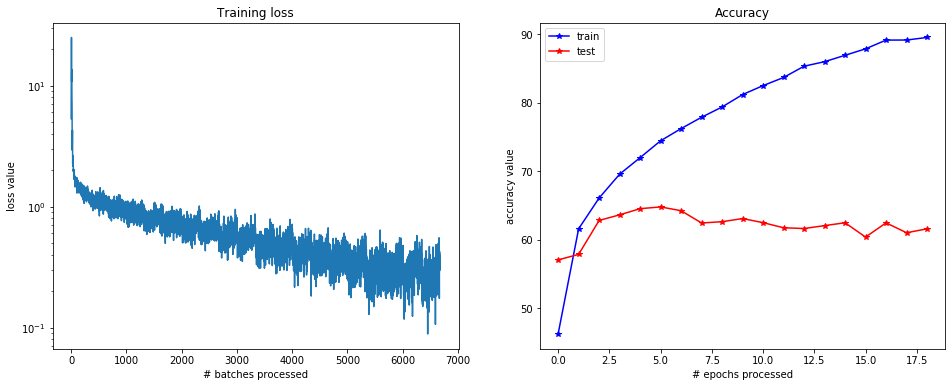

  0%|          | 0/67 [00:00<?, ?it/s]

epoch 19 training stage...
epoch 19 testing stage...


100%|██████████| 67/67 [00:01<00:00, 53.88it/s]


In [0]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=20, lr=0.001, exp_name='net1_lower_LR')
# to stop it press Ctrl+M I in Colab -- works better than "stop" button

Not bad. But [SoTA on CIFAR-10](https://paperswithcode.com/sota/image-classification-on-cifar-10) is 99.3% (achieved by a ConvNet from Google called [Big Transfer](https://arxiv.org/pdf/1912.11370v2.pdf) released on March 30, 2020)... Let's get a bit closer to SoTA. 

What else can be improved? What's really bad about the current network? Let's think of our model now and adapt some best practices.

In [0]:
from torchsummary import summary

model = make_model()
summary(model.to(device), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           3,584
              ReLU-2          [-1, 128, 32, 32]               0
         MaxPool2d-3          [-1, 128, 16, 16]               0
           Flatten-4                [-1, 32768]               0
            Linear-5                 [-1, 1024]      33,555,456
           Dropout-6                 [-1, 1024]               0
            Linear-7                  [-1, 200]         205,000
        LogSoftmax-8                  [-1, 200]               0
Total params: 33,764,040
Trainable params: 33,764,040
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 2.52
Params size (MB): 128.80
Estimated Total Size (MB): 131.33
----------------------------------------------------------------


In [0]:
def make_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        Flatten(),
        nn.Linear(256 * (32 // 16) ** 2, 200),
        nn.BatchNorm1d(200),
        nn.Linear(200, 200),
        nn.LogSoftmax(dim=1)
    )
    return model


In [0]:
from torchsummary import summary

model = make_model()
summary(model.to(device), (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,856
       BatchNorm2d-5          [-1, 128, 32, 32]             256
              ReLU-6          [-1, 128, 32, 32]               0
         MaxPool2d-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 256, 16, 16]         295,168
       BatchNorm2d-9          [-1, 256, 16, 16]             512
             ReLU-10          [-1, 256, 16, 16]               0
           Conv2d-11          [-1, 256, 16, 16]         590,080
      BatchNorm2d-12          [-1, 256, 16, 16]             512
             ReLU-13          [-1, 256, 16, 16]               0
        MaxPool2d-14            [-1, 25

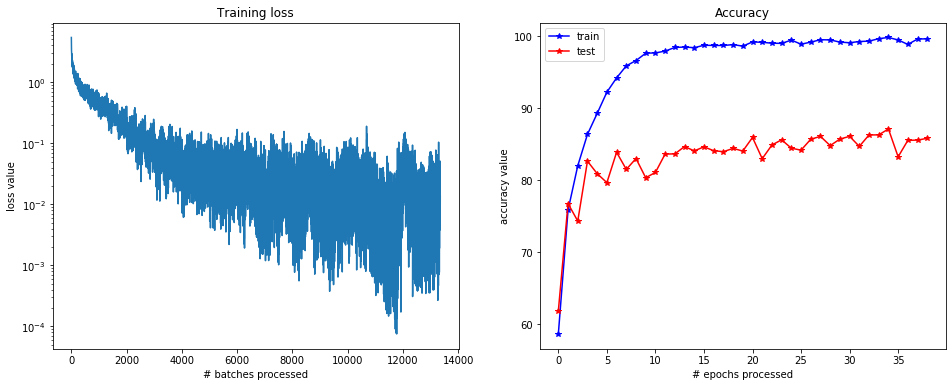

  0%|          | 0/67 [00:00<?, ?it/s]

epoch 39 training stage...
epoch 39 testing stage...


100%|██████████| 67/67 [00:01<00:00, 54.67it/s]


In [0]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=40, lr=0.001, exp_name='vgglike1')
# to stop it press Ctrl+M I in Colab -- works better than "stop" button

### Data augmentation

Let's try augmenting our dataset with artificially made examples. 

We will give PyTorch some information about random transforms which can be made to our training images: flips, rotations, shifts, etc. This way, we get **an infinitely large dataset**!
https://pytorch.org/docs/stable/torchvision/transforms.html

<img src="https://miro.medium.com/max/1000/1*MUOrB2-H5qkJop3Kl2oYmQ.png" width=600> <img src="https://scontent-frt3-2.xx.fbcdn.net/v/t1.0-9/26168447_1615780241794744_3983133794667786526_n.jpg?_nc_cat=101&_nc_sid=730e14&_nc_oc=AQluugTtzF7jeCdL87DgnMmIB-jU2Buj7qplauJ587ncKP5hOIYCJrdEyVdpSd-cHOo&_nc_ht=scontent-frt3-2.xx&oh=eddfa7dbe4a74c44178bac4df27357e1&oe=5EC21664" width=500>

<sub>Picture credits: [link](https://mc.ai/image-data-augmentation-image-processing-in-tensorflow-part-2/) </sub>

In [0]:
my_transform = {
    'train': transforms.Compose(
        [
            transforms.RandomCrop(32, padding=4),  #TRANSFORMATION ON TRAIN SET
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.05),
            transforms.ToTensor(),
        ]),
    'test': transforms.Compose(   #TRANSFORMATION ON TEST SET
        [
            transforms.ToTensor(),
        ])
}

#DOWNLOAD DATASET....
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                             transform=my_transform['train'])#Applying the transformation above to teh train datset
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, 
                                           transform=my_transform['test'])  #Applying the transformation above to the test datset

Files already downloaded and verified
Files already downloaded and verified


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

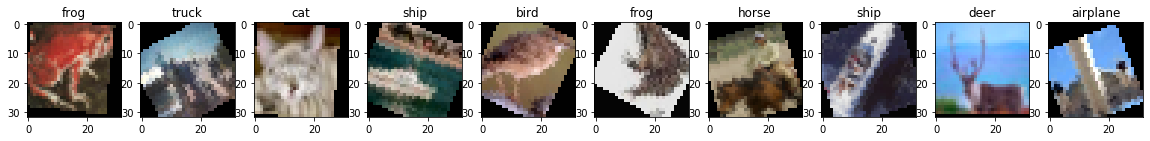

In [0]:
n_pics_to_show = 10
fig, ax = plt.subplots(1, n_pics_to_show, figsize=(20, 10))

for i in range(n_pics_to_show):
    rand_idx = np.random.randint(len(train_dataset))
    pic, label = train_dataset[rand_idx]
    
    pic_np = pic.data.numpy()
    pic_np = np.rollaxis(pic_np, 0, 3)    # 3xHxW to HxWx3
    ax[i].imshow(pic_np)
    ax[i].set_title(class_names[label])

In [0]:
#GET DATASET INTO BATCHES USING DATALOADER...
batch_size = 150  # number of samples processed in one iteration
train_batch_gen = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=4)

batch_size_val = 50
val_batch_gen = torch.utils.data.DataLoader(val_dataset, 
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=1)

In [0]:
def make_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        Flatten(),
        nn.Linear(256 * (32 // 16) ** 2, 200),
        nn.BatchNorm1d(200),
        nn.Linear(200, 200),
        nn.LogSoftmax(dim=1)
    )
    return model


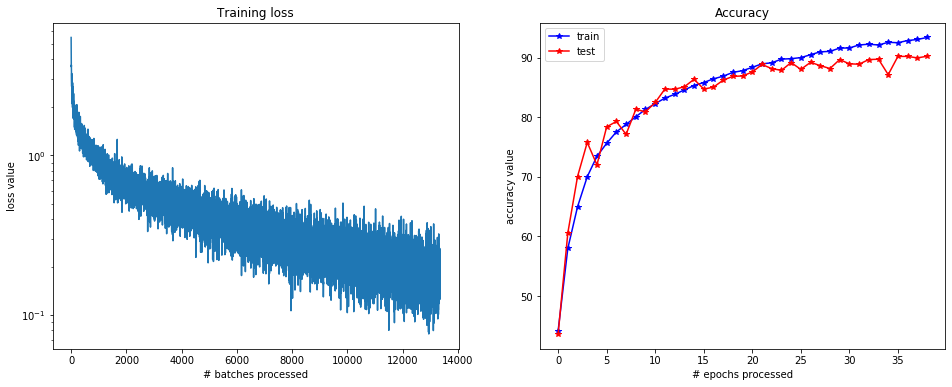

  0%|          | 0/67 [00:00<?, ?it/s]

epoch 39 training stage...
epoch 39 testing stage...


100%|██████████| 67/67 [00:01<00:00, 54.25it/s]


In [0]:
model = make_model()
model = model.to(device)    # transferring model to GPU

train(model, num_epochs=40, lr=0.001, exp_name='vgglike_data_augm')
# to stop it press Ctrl+M I in Colab -- works better than "stop" button

## Important things to bear in mind when training ConvNets

* **Memory:** GPU memory overflows happen all the time; control batch size and resolution of images; investigate how parameters are distributed in the network (`torchsummary`); use `nvidia-smi` or `gpustat` (`gpustat -i` for monitor mode)
* **Learning time:** predict learning time based on epoch time; use the power of torch DataLoaders (change num_workers -- optimal value is connected to number of CPU cores, HDD/SSD speed, data storage scheme); use `htop` to find out what's going on; maximize GPU utilization by looking at `watch -n1 nvidia-smi` or `gpustat -i` (can't be done on Colab, but for more speed it's better to find a server with GPU and do this)
* **Logging:** always save weights of your network as regularly as possible; print enough information on screen; `TensorBoard` is very helpful (can be run in Colab)
* **Data split:** if you choose an architecture based on validation loss, it's much much better to have a separate **test** set and make a train/val/test split in advance

Useful links:
* CS231n: *Convnets* https://cs231n.github.io/convolutional-networks/#case 
* Deeplearning.ai: Very large and nice longread about various ConvNets which exist today and how to build them https://github.com/mbadry1/DeepLearning.ai-Summary/tree/master/4-%20Convolutional%20Neural%20Networks
* TowardsDataScience: *Why does BatchNorm work -- simple explanation* https://towardsdatascience.com/batch-normalization-in-neural-networks-1ac91516821c
* A paper called "*How Does Batch Normalization Help Optimization?*" by researchers from MIT https://arxiv.org/pdf/1805.11604.pdf. The paper states that the internal covariance shift might have little to do with the BatchNorm success.
* Reddit: *Batch Normalization &mdash; before or after ReLU?* https://www.reddit.com/r/MachineLearning/comments/67gonq/d_batch_normalization_before_or_after_relu/
* PyTorch tutorials: *How to use TensorBoard?* https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html